In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('consumption/x.txt')
data[:10] # 消费间隔，消费次数，消费金额

array([[  27.  ,    6.  ,  232.61],
       [   3.  ,    5.  , 1507.11],
       [   4.  ,   16.  ,  817.62],
       [   3.  ,   11.  ,  232.81],
       [  14.  ,    7.  , 1913.05],
       [  19.  ,    6.  ,  220.07],
       [   5.  ,    2.  ,  615.83],
       [  26.  ,    2.  , 1059.66],
       [  21.  ,    9.  ,  304.82],
       [   2.  ,   21.  , 1227.96]])

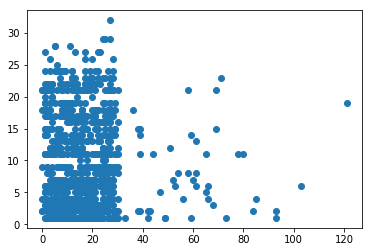

In [3]:
plt.scatter(data[:,0], data[:,1]) # x轴为时间间隔，y轴为消费次数
plt.show()

In [4]:
# 1. 数据标准化
from ML.preprocess import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(data)
X = standardScaler.transform(data)

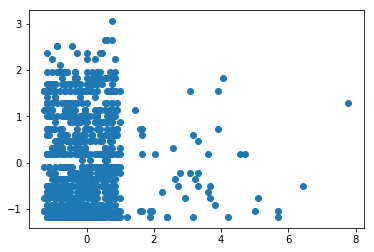

In [5]:
plt.scatter(X[:,0], X[:,1]) # x轴为时间间隔，y轴为消费次数
plt.show()

In [6]:
# 2.确定k的取值，将样本分为k个类别,然后随机初始化k个聚类中心
k = 3
center = np.zeros((k,X.shape[1]))
np.random.seed(601)
for i in range(center.shape[1]):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    center[:, i] = np.ones(k)*min_val + np.random.rand(k)*(max_val-min_val)

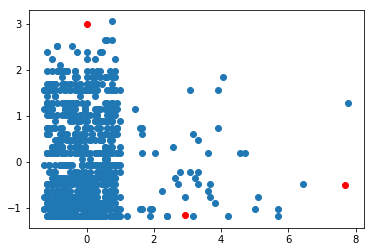

In [7]:
plt.scatter(X[:,0], X[:,1]) 
plt.scatter(center[:,0], center[:,1],color='r')
plt.show()

In [8]:
# 3.计算各特征到聚类中心的距离
def distance(a, b):
    return np.sum(np.abs(a - b)**2)
label = []
for i in range(X.shape[0]):
    temp = []
    for j in range(k):
        temp.append(distance(X[i,:], center[j, :]))
    label.append(np.argsort(temp)[0])
label = np.array(label)

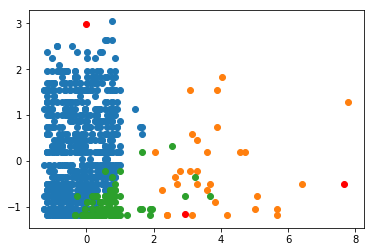

In [9]:
plt.scatter(X[label==0,0], X[label==0,1])
plt.scatter(X[label==1,0], X[label==1,1])
plt.scatter(X[label==2,0], X[label==2,1])
plt.scatter(center[:,0], center[:,1],color='r')
plt.show()

In [10]:
# 调整聚类中心的位置
def new_center(X, label, k):
    center = np.zeros((k, X.shape[1]))
    for col in range(X.shape[1]):
        for i in range(k):
            center[i, col] = X[label==i, col].mean()
    return center

In [11]:
center = new_center(X, label, k)

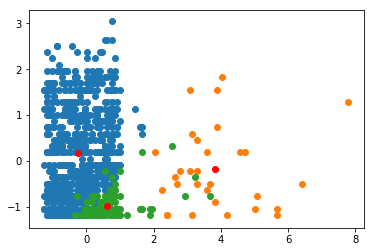

In [12]:
plt.scatter(X[label==0,0], X[label==0,1])
plt.scatter(X[label==1,0], X[label==1,1])
plt.scatter(X[label==2,0], X[label==2,1])
plt.scatter(center[:,0], center[:,1],color='r')
plt.show()

In [13]:
# 重复计算各特征的到聚类中心的距离
def kmeans(X, k, center):
    label = []
    for i in range(X.shape[0]):
        temp = []
        for j in range(k):
            temp.append(distance(X[i,:], center[j, :]))
        label.append(np.argsort(temp)[0])
    return np.array(label)

In [14]:
label = kmeans(X, k, center)

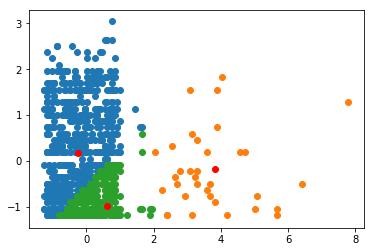

In [15]:
plt.scatter(X[label==0,0], X[label==0,1])
plt.scatter(X[label==1,0], X[label==1,1])
plt.scatter(X[label==2,0], X[label==2,1])
plt.scatter(center[:,0], center[:,1],color='r')
plt.show()

In [16]:
# 重复调整聚类中心位置和计算到聚类中心的距离
while True:
    c = new_center(X, label, k)
    label = kmeans(X, k, c)
    if (c == center).all():
        break
    else:
        center = c

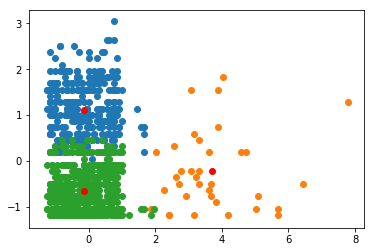

In [17]:
plt.scatter(X[label==0,0], X[label==0,1])
plt.scatter(X[label==1,0], X[label==1,1])
plt.scatter(X[label==2,0], X[label==2,1])
plt.scatter(center[:,0], center[:,1],color='r')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

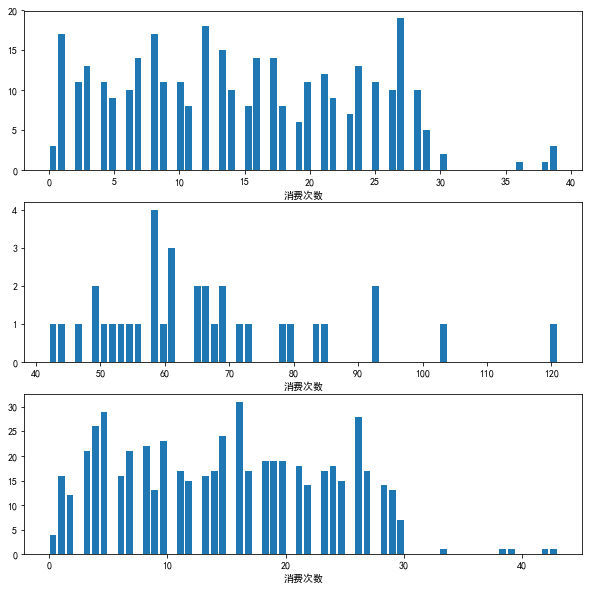

In [26]:
# 进行图表分析
plt.figure(figsize=(10,10))
plt.rc('font',**{'family':'Microsoft YaHer,SimHei'})

plt.subplot(3, 1, 1)
plt.hist(data[label==0,0],rwidth=0.8, bins=60)
plt.xlabel('消费间隔')

plt.subplot(3, 1, 2)
plt.hist(data[label==1,0],rwidth=0.8, bins=60)
plt.xlabel('消费间隔')

plt.subplot(3, 1, 3)
plt.hist(data[label==2,0],rwidth=0.8, bins=60)
plt.xlabel('消费间隔')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

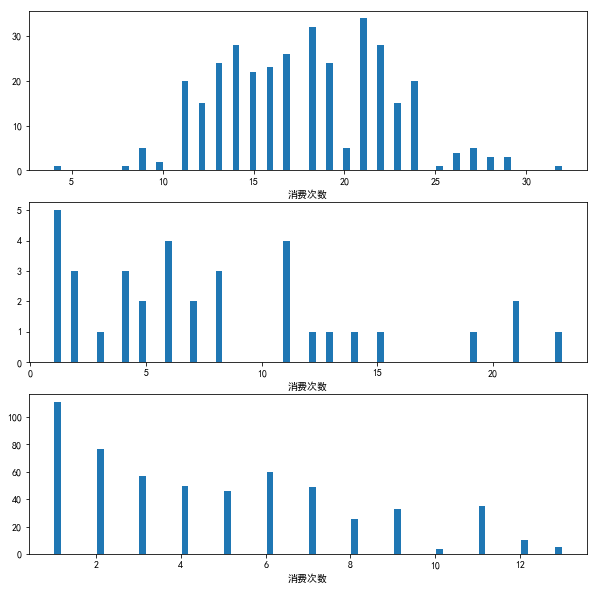

In [27]:
plt.figure(figsize=(10,10))
plt.rc('font',**{'family':'Microsoft YaHer,SimHei'})

plt.subplot(3, 1, 1)
plt.hist(data[label==0,1],rwidth=0.8, bins=60)
plt.xlabel('消费次数')

plt.subplot(3, 1, 2)
plt.hist(data[label==1,1],rwidth=0.8, bins=60)
plt.xlabel('消费次数')

plt.subplot(3, 1, 3)
plt.hist(data[label==2,1],rwidth=0.8, bins=60)
plt.xlabel('消费次数')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

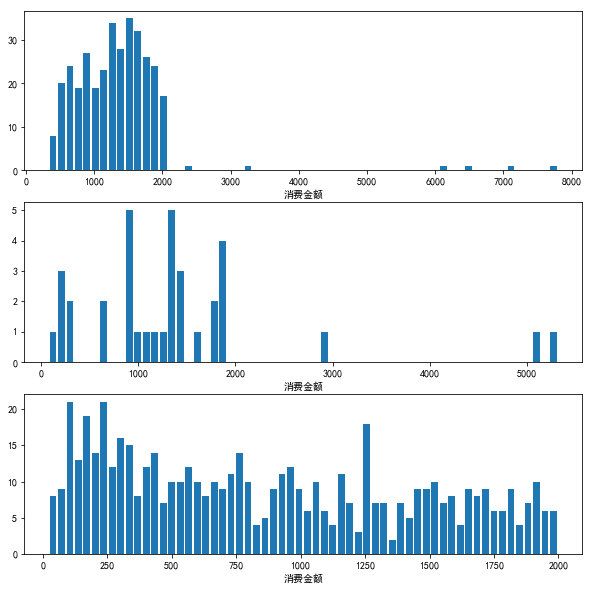

In [28]:
plt.figure(figsize=(10,10))
plt.rc('font',**{'family':'Microsoft YaHer,SimHei'})

plt.subplot(3, 1, 1)
plt.hist(data[label==0,2],rwidth=0.8, bins=60)
plt.xlabel('消费金额')

plt.subplot(3, 1, 2)
plt.hist(data[label==1,2],rwidth=0.8, bins=60)
plt.xlabel('消费金额')

plt.subplot(3, 1, 3)
plt.hist(data[label==2,2],rwidth=0.8, bins=60)
plt.xlabel('消费金额')

plt.show